**Name:**

**Date:**

**Description of activity:**


In [ ]:
from google.colab import drive
drive.mount('/drive')
from PIL import Image
from matplotlib import pyplot as plt
import math


Mounted at /drive


# Exercises
In this activity you will gain practice specifying conditions to be used for replacing the color of some set of pixels in an image with a different color, either specified by the user, as in the <code>removeRedEye</code> function, or taken from another image, as in the <code>swapBack</code> and <code>chromakey</code> functions. The functions used in this activity can be found in the [Conditional Statements and Advanced Image Manipulation](http://www.cs.kzoo.edu/cs103/Readings/ConditionalStatementsAdvanced.pdf) reading.

In [ ]:
# The following function is the Euclidean distance of points in 3-space
# It is used to find distances between 3-tuples of RGB vlaues
def distance(color1, color2):
  d = math.sqrt((color1[0]-color2[0])**2 + (color1[1]-color2[1])**2 + (color1[2]-color2[2])**2)
  return d



In [ ]:
# The following function is used to remove red eye from an image
def removeRedEye(pic, startX, startY, endX, endY, newColor):
  newPic = pic.copy()
  for y in range(startY, endY):
    for x in range(startX, endX):
      if distance(newPic.getpixel((x,y)),(255,0,0)) < 165:
        newPic.putpixel((x,y),newColor)
  return newPic

The following code segment tests the <code>removeRedEye</code> function.  Select an image of your own to test this function with.  If appropriate, you may modify the function to remove blue, or green, or some other color.

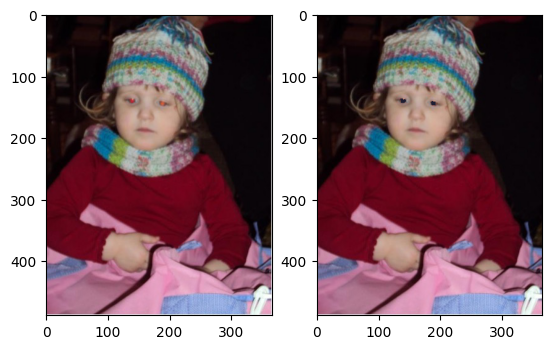

In [ ]:
# Replace this image with one of your own
pic = Image.open("/drive/MyDrive/ColabNotebooks/Picture1.jpg")
eye1 = removeRedEye(pic,127,134, 147,148,(30,30,50))
eye2 = removeRedEye(eye1, 180,140, 200,152, (30,30,50))
f, pics = plt.subplots(1,2)
pics[0].imshow(pic)
pics[1].imshow(eye2)


The next function will replace the background behind a person or persons with a new background by looking for areas of high similarity (low distance between colors) between the image with the person and the image containing just the background.  It then replaces those pixels with the color from the corresponding pixels in a new background.  Test this on your own images.  **Note:** The images used in this function must be the same size!

In [ ]:
# replace background around subject with new background
def swapBack(bgWithPerson, onlyBG, newBG, threshold):
  newPic = bgWithPerson.copy()
  for y in range(newPic.height):
    for x in range(newPic.width):
      pxcolor = newPic.getpixel((x,y))
      bgcolor = onlyBG.getpixel((x,y))
      if distance(pxcolor, bgcolor) < threshold:
        newPic.putpixel((x,y), newBG.getpixel((x,y)))
  return newPic



In [ ]:
# Select the images, then call swapBack, saving the result in
# a variable.  Show the resulting image.
# Consider showing all three images and then the final image.



The next function is the chromakey function.  In order to test this function, you will need an image of something in front of a green screen and a background to be used for replacing the green.  The images must be the same sizes.

In [ ]:
# replace the green background with a more interesting
# background
def chromakey(subjectOnGreen, bg):
  newpic = subjectOnGreen.copy()
  for y in range(newpic.height):
    for x in range(newpic.width):
      rvalue, gvalue, bvalue = newpic.getpixel((x,y))
      if rvalue < 200 and bvalue < 190 and gvalue > 150:
        newpic.putpixel((x,y), bg.getpixel((x,y)))
  return newpic

In [ ]:
# Test the chromakey function here



# (Optional) Saving and Submitting

Once you have created results that you are pleased with, skim through your notebook and make sure everything looks the way you expect. If it all looks good, save this notebook as a .ipynb. (Go to File -> Download -> Download .ipynb)

Submit your .ipynb file on Kit.  The submission will be reviewed but is not counted in the overall grade.